<a href="https://colab.research.google.com/github/rahuldevkar5/Data_Science/blob/main/Decision_Trees_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

In [2]:
company=pd.read_csv('/content/Company_Data.csv')
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
company.drop(columns=['CompPrice','Income','Price','Age','Education'],inplace=True)

In [4]:
#Creating dummy vairables for ['ShelveLoc','US','Urban'] dropping first dummy variable
Company=pd.get_dummies(company,columns=['ShelveLoc','US','Urban'], drop_first=True)
Company

,Sales,Advertising,Population,ShelveLoc_Good,ShelveLoc_Medium,US_Yes,Urban_Yes
0,9.50,11,276,0,0,1,1
1,11.22,16,260,1,0,1,1
2,10.06,10,269,0,1,1,1
3,7.40,4,466,0,1,1,1
4,4.15,3,340,0,0,0,1
...,...,...,...,...,...,...,...
395,12.57,17,203,1,0,1,1
396,6.14,3,37,0,1,1,0
397,7.41,12,368,0,1,1,1
398,5.94,7,284,0,0,1,1


In [5]:
#Creating new cols sale and dividing 'sales' cols on the basis of [2,9,15] for yes and no
Company["Sale"] = pd.cut(Company["Sales"], bins = [2,9,15], labels = ["No", "Yes"])
Company

,Sales,Advertising,Population,ShelveLoc_Good,ShelveLoc_Medium,US_Yes,Urban_Yes,Sale
0,9.50,11,276,0,0,1,1,Yes
1,11.22,16,260,1,0,1,1,Yes
2,10.06,10,269,0,1,1,1,Yes
3,7.40,4,466,0,1,1,1,No
4,4.15,3,340,0,0,0,1,No
...,...,...,...,...,...,...,...,...
395,12.57,17,203,1,0,1,1,Yes
396,6.14,3,37,0,1,1,0,No
397,7.41,12,368,0,1,1,1,No
398,5.94,7,284,0,0,1,1,No


In [6]:
#creating dummies for the sales
Company = pd.get_dummies(Company,columns = ["Sale"],drop_first=True)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_company_df = scaler.fit_transform(Company.iloc[:,0:8])
scaled_company_df

array([[ 0.71037626,  0.65717702,  0.07581929, ...,  0.74188112,
         0.64686916,  1.61356859],
       [ 1.32017934,  1.40995711, -0.0328822 , ...,  0.74188112,
         0.64686916,  1.61356859],
       [ 0.9089168 ,  0.506621  ,  0.02826239, ...,  0.74188112,
         0.64686916,  1.61356859],
       ...,
       [-0.03060538,  0.80773304,  0.70085283, ...,  0.74188112,
         0.64686916, -0.61974434],
       [-0.55177428,  0.05495295,  0.13017003, ...,  0.74188112,
         0.64686916, -0.61974434],
       [ 0.78482897, -0.99893918, -1.61584759, ...,  0.74188112,
         0.64686916,  1.61356859]])

In [8]:
#converting sales column into category.
Company['Sales'] = Company['Sales'].astype('category')

In [9]:
x=Company.iloc[:,0:7]
y=Company.iloc[:,-1]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [10]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree

In [11]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

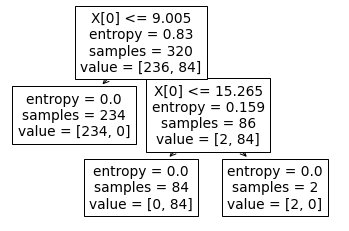

In [12]:
#PLot the decision tree
tree.plot_tree(model);

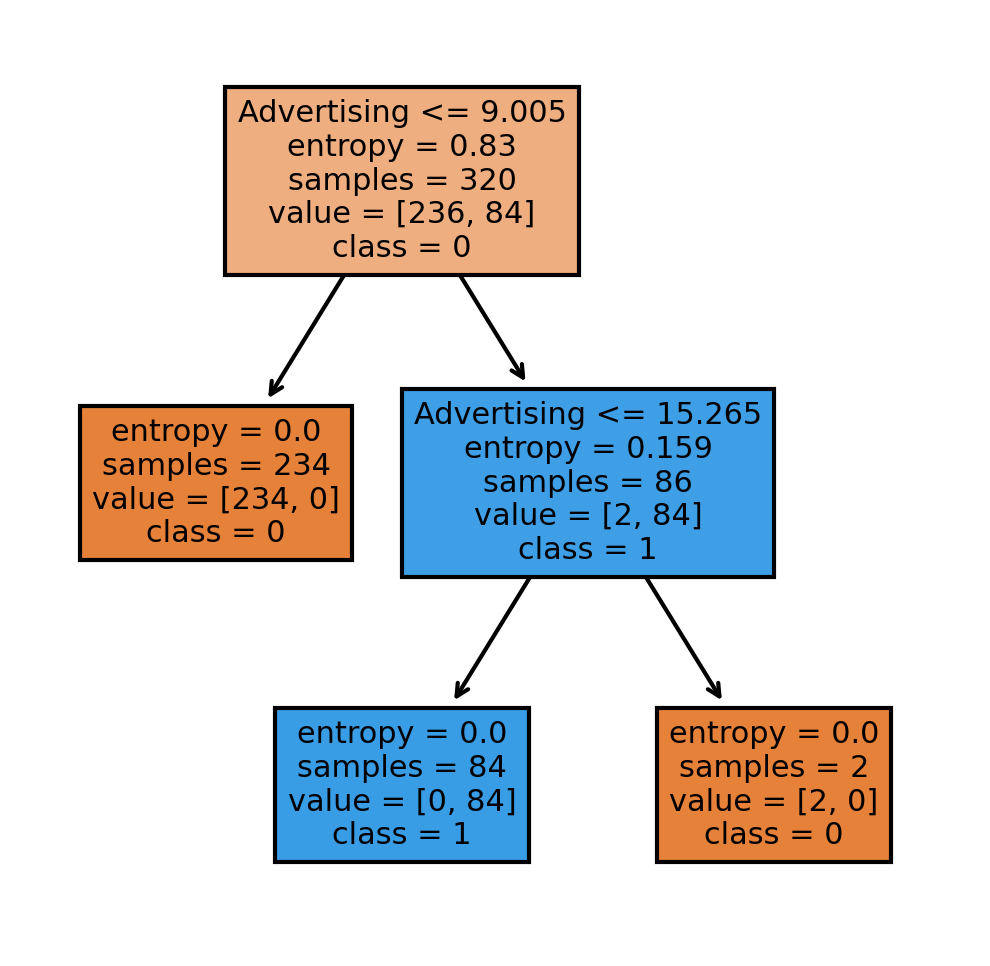

In [13]:
fn=['Advertising','Population','ShelveLoc_Good','ShelveLoc_Medium','US_Yes','Urban_YES']
cn=['0', '1']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,feature_names = fn, class_names=cn,filled = True);

In [14]:
y_pred=model.predict(x_test)
y_pred

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1], dtype=uint8)

In [15]:
model.score(x_test,y_test)

1.0

In [16]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [17]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [18]:
y_pred=model.predict(x_test)
np.mean(y_pred==y_test)

1.0

In [19]:
from sklearn.tree import  DecisionTreeRegressor
from sklearn import tree

In [20]:
model = DecisionTreeRegressor()
model.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [21]:
y_pred=model.predict(x_test)
y_pred

array([1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0.,
       1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1.])

In [22]:
model.score(x_test,y_test)

1.0